# Exploratory analysis
Notebook to experiment with own `api_wrapper` and preliminary analysis

## Imports

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
from IPython.core.display import Image, display

# Own API handler and tools
import mercadolibre as ml

## Styling

In [2]:
# Charts styling
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
#plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

# Style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style/style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Query

In [3]:
# Sets input parameters 
DAYS_AGO = 365              # Days to look back in visits history
ITEMS_TO_QUERY = 200        # Number of itens requested per query (max. permitted by ML is 200)
TOTAL_ITEMS_TO_QUERY = 1000 # Max. number of results to be downloaded ("None" to make it limitless)
ITEMS_TO_PLOT = 10          # List of "ITEMS_TO_PLOT" top sold items; e.g. if 10, visits from top 10 sold itens will be plotted

In [4]:
# Search inputs
_query = 'fonte'
_category = 'MLB5940'

df = ml.get_df_from_query(query=_query, category=_category, \
                       items_per_query=ITEMS_TO_QUERY, total_results_limit=TOTAL_ITEMS_TO_QUERY)

Searching for "fonte" in Acessórios de PC sold by N/A...


100%|██████████| 1000/1000 [00:08<00:00, 122.58it/s]


Initial request sent to API: https://api.mercadolibre.com/sites/MLB/search?offset=0&limit=1&q=fonte&category=MLB5940
2546 results found.


In [5]:
df.sort_values('revenue').head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,seller,stop_time,category_id,revenue,start_time,days_ago,city,state,seller_id
id,,,,,,,,,,,,,,,,
MLB815792416,Fonte Pico Psu 160 Wats,110.00,0,2,http://produto.mercadolivre.com.br/MLB-8157924...,http://mlb-s1-p.mlstatic.com/513705-MLB2506598...,"{'comment': '', 'id': 123300696, 'city': {'nam...","{'real_estate_agency': False, 'power_seller_st...",2036-11-21 22:31:26,MLB4108,0.0,2016-11-21 22:31:26,5,Pancas,Espírito Santo,60955696
MLB728392049,* Cabo Adaptador Extensor Para Fonte Atx 40cm ...,19.99,0,1,http://produto.mercadolivre.com.br/MLB-7283920...,http://mlb-s1-p.mlstatic.com/833211-MLB2051371...,"{'comment': '', 'id': 60961810, 'city': {'name...","{'real_estate_agency': False, 'power_seller_st...",2035-12-22 01:10:20,MLB63356,0.0,2015-12-22 01:10:20,341,São Paulo,São Paulo,4297356
MLB777559240,Cabo De Força Serial Ata Sata Para Molex Ide F...,4.99,0,50,http://produto.mercadolivre.com.br/MLB-7775592...,http://mlb-s1-p.mlstatic.com/655621-MLB2080414...,"{'comment': '', 'id': 136078244, 'city': {'nam...","{'real_estate_agency': False, 'power_seller_st...",2036-08-20 01:44:54,MLB9600,0.0,2016-08-20 01:44:54,99,Rio de Janeiro,Rio de Janeiro,33427010
MLB727889393,Cabo Força Tripolar P/ Cpu E Fontes,7.99,0,1,http://produto.mercadolivre.com.br/MLB-7278893...,http://mlb-s2-p.mlstatic.com/216211-MLB2051152...,"{'comment': '', 'id': 160835413, 'city': {'nam...","{'real_estate_agency': False, 'power_seller_st...",2035-12-02 19:51:21,MLB9566,0.0,2015-12-02 19:51:21,360,Salvador,Bahia,178702867
MLB727024897,Fonte Supermicro Pws-741p-1r 740w 80plus Plat...,1384.68,0,4,http://produto.mercadolivre.com.br/MLB-7270248...,http://mlb-s1-p.mlstatic.com/285211-MLB2050787...,"{'comment': '', 'id': 145725108, 'city': {'nam...","{'real_estate_agency': False, 'power_seller_st...",2035-11-29 01:42:35,MLB4108,0.0,2015-11-29 01:42:35,364,Sarandi,Paraná,149976757


In [6]:
ds = df.describe()
ds

,price,sold_quantity,available_quantity,revenue,days_ago
count,754.000000,754.000000,754.000000,754.000000,754.000000
mean,83.608700,23.888594,605.912467,710.622427,243.127321
std,193.982177,106.919194,6302.773072,3083.565025,148.975856
min,1.000000,0.000000,1.000000,0.000000,5.000000
25%,12.990000,0.000000,2.000000,0.000000,99.000000
50%,30.000000,1.000000,7.000000,35.950000,233.000000
75%,75.900000,7.000000,29.750000,240.000000,388.000000
max,2494.000000,1220.000000,99997.000000,40041.990000,502.000000


## Analysis & visualization

In [7]:
names = ml.fix_names(_query, _category)

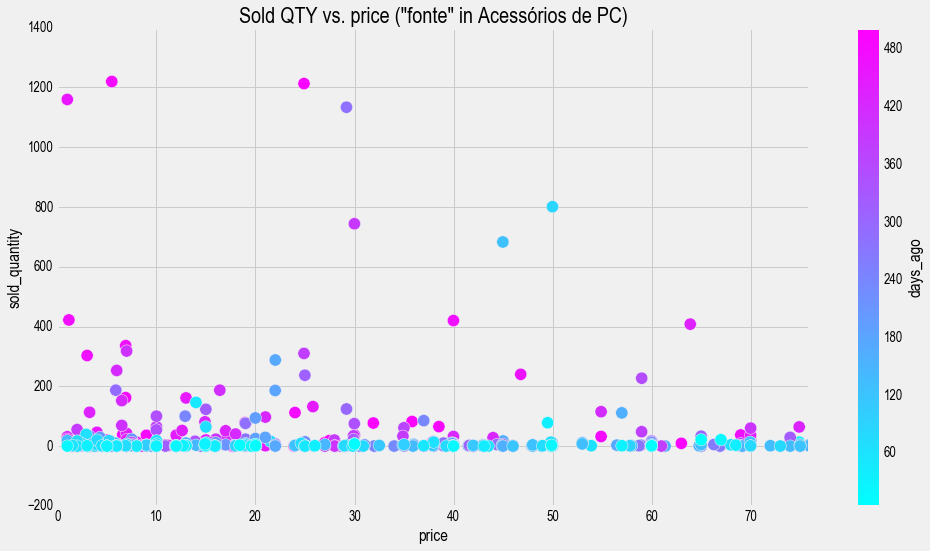

In [8]:
_xlim=(0, ds.loc['75%', 'price'])

df.plot.scatter('price', 'sold_quantity', c='days_ago', cmap='cool', xlim=_xlim, s=150)
plt.title('Sold QTY vs. price ("' + names['query'] + '"' + ' in ' + names['category'] + ')', fontsize=22)

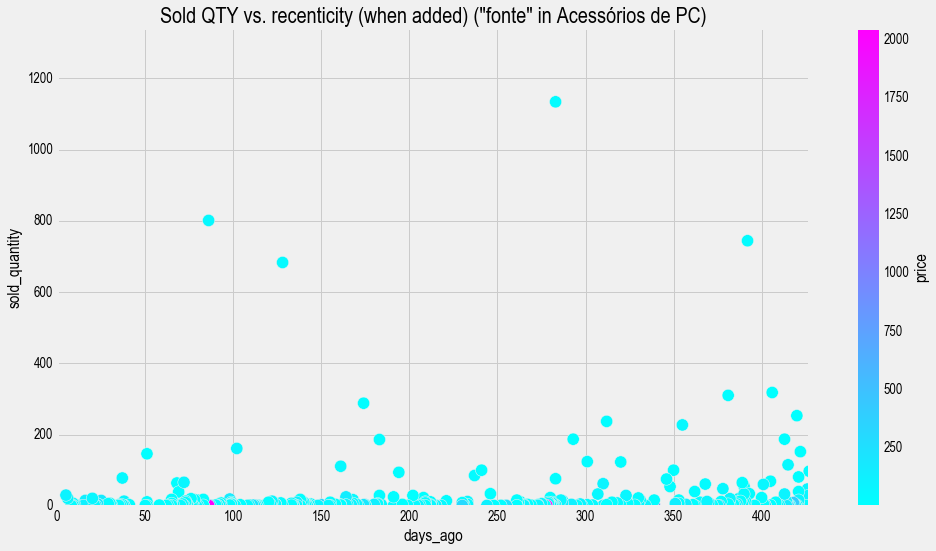

In [10]:
_ymin = ds.loc['25%', 'sold_quantity']

a = df[(df.sold_quantity > _ymin)]

_xlim = (0, ds.loc['75%', 'days_ago']*1.1)
_ylim = (0, ds.loc['max', 'sold_quantity']*1.1)

a.plot.scatter('days_ago', 'sold_quantity', c='price', cmap='cool', xlim=_xlim, ylim=_ylim, s=150)
plt.title('Sold QTY vs. recenticity (when added) ("' + names['query'] + '"' + ' in ' + names['category'] + ')', fontsize=22)